In [1]:
!pip install tensorflow-gpu

In [2]:
!pip install mlxtend

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.2.0'

In [0]:
from tensorflow.keras.datasets import  cifar10

In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [0]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [10]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

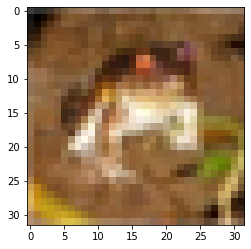

In [11]:
plt.imshow(x_train[0])

## Build CNN Model

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [15]:
history=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 123s 25ms/step - loss: 1.4198 - sparse_categorical_accuracy: 0.4898 - val_loss: 1.0816 - val_sparse_categorical_accuracy: 0.6199
Epoch 2/10
5000/5000 [==============================] - 120s 24ms/step - loss: 1.0913 - sparse_categorical_accuracy: 0.6115 - val_loss: 0.9461 - val_sparse_categorical_accuracy: 0.6693
Epoch 3/10
5000/5000 [==============================] - 120s 24ms/step - loss: 0.9778 - sparse_categorical_accuracy: 0.6581 - val_loss: 0.9299 - val_sparse_categorical_accuracy: 0.6719
Epoch 4/10
5000/5000 [==============================] - 120s 24ms/step - loss: 0.8983 - sparse_categorical_accuracy: 0.6857 - val_loss: 0.8666 - val_sparse_categorical_accuracy: 0.6955
Epoch 5/10
5000/5000 [==============================] - 121s 24ms/step - loss: 0.8418 - sparse_categorical_accuracy: 0.7037 - val_loss: 0.8944 - val_sparse_categorical_accuracy: 0.6989
Epoch 6/10
5000/5000 [==============================] - 120s 24ms/step - lo

In [16]:
history.history

{'loss': [1.419758915901184,
  1.0913022756576538,
  0.977759599685669,
  0.8982527256011963,
  0.8418009281158447,
  0.7899985909461975,
  0.7522662281990051,
  0.7214111089706421,
  0.6883671283721924,
  0.6611754894256592],
 'sparse_categorical_accuracy': [0.4898200035095215,
  0.6114599704742432,
  0.6581000089645386,
  0.6857200264930725,
  0.7036600112915039,
  0.7212200164794922,
  0.7363200187683105,
  0.7466400265693665,
  0.7577800154685974,
  0.7658600211143494],
 'val_loss': [1.081603765487671,
  0.9461495876312256,
  0.9299013614654541,
  0.8666428923606873,
  0.8943547010421753,
  0.8239107131958008,
  0.8308431506156921,
  0.8050287365913391,
  0.7745622396469116,
  0.8150433897972107],
 'val_sparse_categorical_accuracy': [0.6198999881744385,
  0.6693000197410583,
  0.6718999743461609,
  0.6955000162124634,
  0.6988999843597412,
  0.7125999927520752,
  0.7149999737739563,
  0.7279000282287598,
  0.7318999767303467,
  0.7254999876022339]}

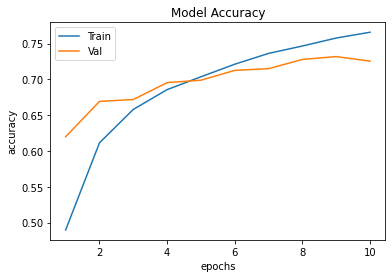

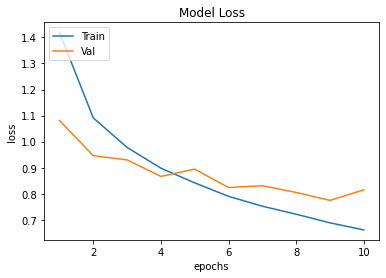

In [17]:
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Val'], loc='upper left')
plt.show()